In [1]:
#site: https://github.com/pcm-dpc/COVID-19
#function 1: grafico a bolle
#function 2: graficare andamento rapporto nuovi_positivi/nuovi_tamponi
#function 3: calcolare andamento regionale nuovi_positivi/nuovi_tamponi
#funciont 4: graficare la media mobile a 7 giorni per andamento nazionale

In [2]:
#import of all libraries I need
import pandas as pd
import numpy as np
import requests as rq
import json as js
from matplotlib import pyplot as mp

In [30]:
def showGraph(x_axis, y1_axis, y2_axis, x_label, y_label, info_legend1, info_legend2):
    
    with mp.rc_context({'axes.edgecolor':'black', 'axes.facecolor':'black',
                     'font.family':'sans-serif', 'figure.facecolor':'black', 'figure.edgecolor':'black',
                     'xtick.color':'white', 'ytick.color':'white', 'savefig.transparent':'True',
                     'figure.facecolor':'black'}):
  
        mp.figure(figsize=(21,9))
        mp.plot(range(0,x_axis), y1_axis, color='green', label=info_legend1)
        if(y2_axis != 0): mp.plot(range(0,x_axis), y2_axis, color='blue', label=info_legend2)

        mp.title("$Covid\ trend\ Italy\ about\ %d\ days$" %(x_axis), color="grey", fontsize=25)
        mp.grid(color="grey")

        mp.ylabel(y_label, color="grey", rotation="horizontal", fontsize=20, labelpad=60)
        mp.xlabel(x_label, color="grey", fontsize=20, labelpad=20)

        #mp.savefig('graph_new_cases.png')
        legend = mp.legend(fontsize=25)
        mp.setp(legend.get_texts(), color='w')
        mp.show()        

In [4]:
def calculateNewTamponi(dataframe, len_dataframe):
    
    new_tamponi = []
    
    for i in range(0, len_dataframe):
        if(i == 0): 
            previus_value = dataframe.tamponi[i]
            new_tamponi.append(dataframe.tamponi[i])
        else: 
            nuovi_tamponi = dataframe.tamponi[i] - previus_value
            previus_value = dataframe.tamponi[i]
            new_tamponi.append(nuovi_tamponi)

    return new_tamponi

In [5]:
#calculate the ratio "nuovi_positivi/nuovi_tamponi"
def calculateRatio(dataset, len_dataframe, new_tamponi):
    
    ratio = []
    
    for i in range(0, len_dataframe):
        if new_tamponi[i] == 0:
            ratio.append(0)
        else:
            #approximate the number
            approx = round(dataset.nuovi_positivi[i]/new_tamponi[i], 2)
            ratio.append(approx)
            
    return ratio

     nuovi_positivi   tamponi  Ratio  New tamponi
0               221      4324   0.05         4324
1                93      8623   0.02         4299
2                78      9587   0.08          964
3               250     12014   0.10         2427
4               238     15695   0.06         3681
..              ...       ...    ...          ...
368           20499  39552816   0.06       325404
369           18916  39875863   0.06       323047
370           17455  40132887   0.07       257024
371           13114  40303520   0.08       170633
372           17083  40639503   0.05       335983

[373 rows x 4 columns]


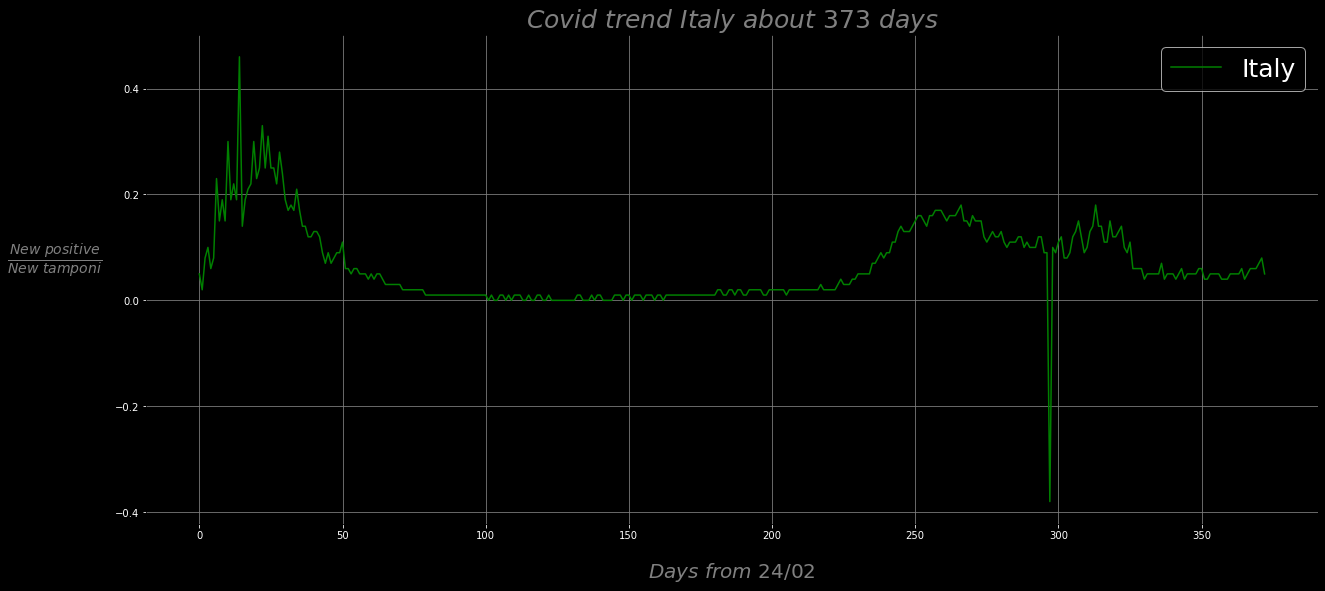

In [31]:
#function 2
'''
Calcolare e graficare per ogni data dell'andamento nazionale il rapporto
nuovi_positivi e nuovi_tamponi, dove nuove_tamponi è una colonna calcolata
rappresentante il numero di nuovi tampo effettuati
'''
def function2():

    #load the data
    URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json"
    data = pd.read_json(URL)
    
    #pick only "nuovi_positivi" e "tamponi"
    dataframe = data.loc[:,['nuovi_positivi', 'tamponi']]
    #calculate "nuovi_tamponi"
    len_dataframe = len(dataframe)
    new_tamponi = calculateNewTamponi(dataframe, len_dataframe)

    #calculate the rate "nuovi_positivi/nuovi_tamponi"
    ratio = calculateRatio(dataframe, len_dataframe, new_tamponi)
    
    #add the ratio column
    dataframe["Ratio"] = ratio
    dataframe["New tamponi"] = new_tamponi
    print(dataframe)
    
    #display the graph
    x_label = "$Days\ from\ 24/02$"
    y_label = r"$\frac{New\ positive}{New\ tamponi}$"
    showGraph(len_dataframe, ratio, 0, x_label, y_label, "Italy", "null")
    
function2()

Insert a region (e.g. Lazio)
Lazio
Insert the second region (e.g. Basilicata)
(Digit null if you don't want)
Calabria
     nuovi_positivi  tamponi  Ratio  New tamponi
0                 2      124   0.02          124
1                 0      124   0.00            0
2                 0      124   0.00            0
3                 0      552   0.00          428
4                 0      611   0.00           59
..              ...      ...    ...          ...
368            1539  4049291   0.04        34715
369            1347  4081562   0.04        32271
370            1341  4116403   0.04        34841
371            1044  4132010   0.07        15607
372            1188  4169881   0.03        37871

[373 rows x 4 columns]
     nuovi_positivi  tamponi  Ratio  New tamponi
0                 0        1   0.00            1
1                 0        2   0.00            1
2                 0        3   0.00            1
3                 0       14   0.00           11
4                 1      

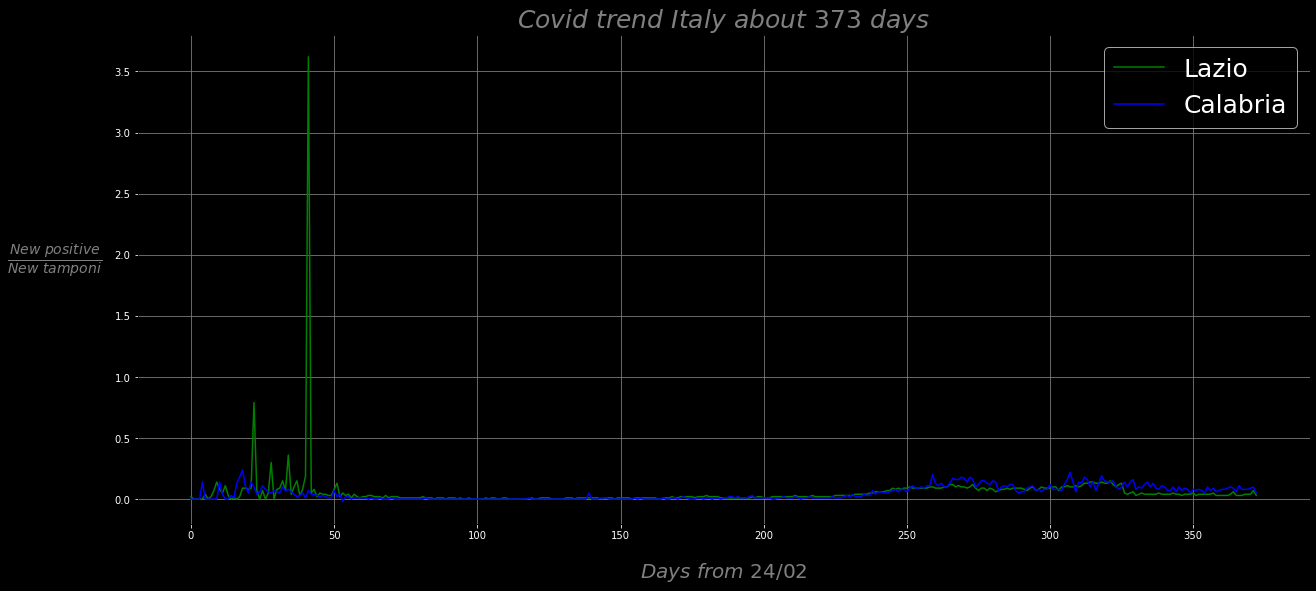

In [32]:
#function 3
'''
Calcolare per ogni data dell'andamento regionale il rapporto
tra nuovi_positivi e nuovi_tamponi, dove nuovi_tamponi è una colonna calcolata
rappresentante il numero di nuovi tamponi effettuati.
Nota: in aggiunta la funziona produce il grafico della regione, e un grafico di contronto tra due regioni
(se ovvimente viene inserita una seconda regione da confrontare)
'''
def function3():
    
    #load the data
    URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-regioni.json"
    data = pd.read_json(URL)
    regions = ["Lombardia", "Lazio", "Campania", "Sicilia", "Veneto", "Emilia-Romagna", 
                "Piemonte", "Puglia", "Toscana", "Calabria", "Sardegna", "Liguria", 
                "Marche", "Abruzzo", "Friuli-Venezia Giulia", "Umbria", "Basilicata",
                "Molise", "Valle d'Aosta", "null"]

    input_region1 = input("Insert a region (e.g. Lazio)\n")    
    while(input_region1 not in regions): 
        print("Region not valid!\n")
        input_region1 = input("Insert a region (e.g. Lazio)\n")    
    
    input_region2 = input("Insert the second region (e.g. Basilicata)\n(Digit null if you don't want)\n")    
    while(input_region2 not in regions): 
        print("Input not valid!\n")        
        input_region2 = input("Insert the second region (e.g. Basilicata)\n(Digit null if you don't want)\n")    
        
    
    #calculate all value for the region 1
    region1_dataframe = data.loc[data.denominazione_regione == input_region1,['nuovi_positivi', 'tamponi']]
    #change the index value
    region1_dataframe.index = [x for x in range(0, len(region1_dataframe.values))]
    len_dataframe = len(region1_dataframe)
    new_tamponi_region1 = calculateNewTamponi(region1_dataframe, len_dataframe)
    region1_ratio = calculateRatio(region1_dataframe, len_dataframe, new_tamponi_region1)
    
    #add the ratio column
    region1_dataframe["Ratio"] = region1_ratio
    region1_dataframe["New tamponi"] = new_tamponi_region1
    print(region1_dataframe)
    
    
    #calculate all value for the region 2
    region2_ratio = 0
    if(input_region2 != "null"): 
        region2_dataframe = data.loc[data.denominazione_regione == input_region2,['nuovi_positivi', 'tamponi']]
        region2_dataframe.index = [x for x in range(0, len(region2_dataframe.values))]
        new_tamponi_region2 = calculateNewTamponi(region2_dataframe, len_dataframe)
        region2_ratio = calculateRatio(region2_dataframe, len_dataframe, new_tamponi_region2)
        
        #add the ratio column
        region2_dataframe["Ratio"] = region2_ratio
        region2_dataframe["New tamponi"] = new_tamponi_region2
        print(region2_dataframe)

    #display the graph
    x_label = "$Days\ from\ 24/02$"
    y_label = r"$\frac{New\ positive}{New\ tamponi}$"
    showGraph(len_dataframe, region1_ratio, region2_ratio, x_label, y_label, input_region1, input_region2)
    
function3()